<a href="https://colab.research.google.com/github/NiyazovIlia/megafon/blob/course/megafon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Установка и вызов всех необходимых библиотек

In [1]:
!pip install dask[dataframe]
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dask.dataframe as dd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
import pickle
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [3]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hV75oShmYKDsKGK05UXAaiJFLZWuRQ3m' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1hV75oShmYKDsKGK05UXAaiJFLZWuRQ3m" -O data_test.csv && rm -rf /tmp/cookies.txt 

--2022-08-11 16:32:58--  https://docs.google.com/uc?export=download&confirm=&id=1hV75oShmYKDsKGK05UXAaiJFLZWuRQ3m
Resolving docs.google.com (docs.google.com)... 172.253.123.139, 172.253.123.113, 172.253.123.101, ...
Connecting to docs.google.com (docs.google.com)|172.253.123.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ickbnd4u9ulm77ubrd0tk8g8f005kiss/1660235550000/13259804341096435890/*/1hV75oShmYKDsKGK05UXAaiJFLZWuRQ3m?e=download&uuid=eff4531a-36ea-4456-b164-716e7de690bb [following]
--2022-08-11 16:32:59--  https://doc-0o-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ickbnd4u9ulm77ubrd0tk8g8f005kiss/1660235550000/13259804341096435890/*/1hV75oShmYKDsKGK05UXAaiJFLZWuRQ3m?e=download&uuid=eff4531a-36ea-4456-b164-716e7de690bb
Resolving doc-0o-a8-docs.googleusercontent.com (doc-0o-a8-docs.googleusercontent.com)... 74.125.28.132

In [4]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SoE3gMljG0I8bbke0Oi68GOHYiIszU6Y' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1SoE3gMljG0I8bbke0Oi68GOHYiIszU6Y" -O data_train.csv && rm -rf /tmp/cookies.txt 

--2022-08-11 16:33:01--  https://docs.google.com/uc?export=download&confirm=&id=1SoE3gMljG0I8bbke0Oi68GOHYiIszU6Y
Resolving docs.google.com (docs.google.com)... 172.253.123.139, 172.253.123.113, 172.253.123.101, ...
Connecting to docs.google.com (docs.google.com)|172.253.123.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vut38tu1vk60kfe5ckdgj0sv5pko43ob/1660235550000/13259804341096435890/*/1SoE3gMljG0I8bbke0Oi68GOHYiIszU6Y?e=download&uuid=8cab983e-d960-4d86-b1de-4a405bed8f0c [following]
--2022-08-11 16:33:02--  https://doc-0c-a8-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vut38tu1vk60kfe5ckdgj0sv5pko43ob/1660235550000/13259804341096435890/*/1SoE3gMljG0I8bbke0Oi68GOHYiIszU6Y?e=download&uuid=8cab983e-d960-4d86-b1de-4a405bed8f0c
Resolving doc-0c-a8-docs.googleusercontent.com (doc-0c-a8-docs.googleusercontent.com)... 74.125.31.132

In [5]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1d7ICyzw3OoY3OCJ5MZ0MXzsZ1hF7zdD9' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1d7ICyzw3OoY3OCJ5MZ0MXzsZ1hF7zdD9" -O train10.zip && rm -rf /tmp/cookies.txt 

--2022-08-11 16:33:03--  https://docs.google.com/uc?export=download&confirm=t&id=1d7ICyzw3OoY3OCJ5MZ0MXzsZ1hF7zdD9
Resolving docs.google.com (docs.google.com)... 172.253.123.139, 172.253.123.113, 172.253.123.101, ...
Connecting to docs.google.com (docs.google.com)|172.253.123.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-6o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ai1l4nb13c8k02uvsjkaav9rua6e4aoe/1660235550000/17048903237944838917/*/1d7ICyzw3OoY3OCJ5MZ0MXzsZ1hF7zdD9?e=download&uuid=f48eb151-87bf-4172-9bbe-335ad1637756 [following]
--2022-08-11 16:33:03--  https://doc-0o-6o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ai1l4nb13c8k02uvsjkaav9rua6e4aoe/1660235550000/17048903237944838917/*/1d7ICyzw3OoY3OCJ5MZ0MXzsZ1hF7zdD9?e=download&uuid=f48eb151-87bf-4172-9bbe-335ad1637756
Resolving doc-0o-6o-docs.googleusercontent.com (doc-0o-6o-docs.googleusercontent.com)... 74.125.28.13

In [6]:
%%time
!unzip train10.zip

Archive:  train10.zip
  inflating: features.csv            
  inflating: __MACOSX/._features.csv  
CPU times: user 1.56 s, sys: 232 ms, total: 1.79 s
Wall time: 3min 41s


In [3]:
%%time
features = dd.read_csv('features.csv', sep='\t')
train = pd.read_csv('data_train.csv')
test = pd.read_csv('data_test.csv')

CPU times: user 3.81 s, sys: 150 ms, total: 3.96 s
Wall time: 4.27 s


In [4]:
features.head()

,Unnamed: 0,id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
0,0,2013026,1531688400,18.910029,46.980888,4.969214,-1.386798,3.791754,-14.01179,-16.08618,...,-977.373846,-613.770792,-25.996269,-37.630448,-301.747724,-25.832889,-0.694428,-12.175933,-0.45614,0.0
1,1,2014722,1539550800,36.690029,152.400888,448.069214,563.833202,463.841754,568.99821,-16.08618,...,-891.373846,-544.770792,-20.996269,48.369552,80.252276,-13.832889,-0.694428,-1.175933,-0.45614,0.0
2,2,2015199,1545598800,-67.019971,157.050888,-63.180786,178.103202,-68.598246,156.99821,3.51382,...,-977.373846,-613.770792,-12.996269,-37.630448,10829.252276,-25.832889,-0.694428,-12.175933,-0.45614,0.0
3,3,2021765,1534107600,7.010029,150.200888,-6.930786,216.213202,76.621754,351.84821,-16.08618,...,-973.373846,-613.770792,-23.996269,-37.630448,-205.747724,-24.832889,-0.694428,-11.175933,-0.45614,1.0
4,4,2027465,1533502800,-90.439971,134.220888,-104.380786,153.643202,-109.798246,132.53821,-16.08618,...,1643.626154,2007.229208,206.003731,-21.630448,6667.252276,92.167111,-0.694428,49.824067,47.54386,0.0


## Доработка данных и объединение с признаками 

In [5]:
%%time
array_id = train['id'].values
print(len(array_id))
for i in test['id'].values:
  if i not in array_id:
    array_id = np.append(array_id, i)
print(len(array_id))

831653
897617
CPU times: user 2min 13s, sys: 5.24 s, total: 2min 18s
Wall time: 2min 47s


In [6]:
%%time
features = features.loc[features['id'].isin(array_id),:]
features_new = features.compute()

CPU times: user 7min 58s, sys: 24.6 s, total: 8min 23s
Wall time: 5min 35s


## Понижение веса данных

In [7]:
def downgrade(data):
  for i in data.columns:
    if data[i].dtype == 'int64':
      data[i] = data[i].astype('int32')
    elif data[i].dtype == 'float64':
      data[i] = data[i].astype('float32')

In [8]:
downgrade(test)
downgrade(train)
downgrade(features_new)

In [9]:
train.dtypes, test.dtypes, features_new.dtypes

(Unnamed: 0      int32
 id              int32
 vas_id        float32
 buy_time        int32
 target        float32
 dtype: object, Unnamed: 0      int32
 id              int32
 vas_id        float32
 buy_time        int32
 dtype: object, Unnamed: 0      int32
 id              int32
 buy_time        int32
 0             float32
 1             float32
                ...   
 248           float32
 249           float32
 250           float32
 251           float32
 252           float32
 Length: 256, dtype: object)

## Создание общих данных

In [10]:
%%time
train_df = pd.merge_asof(train.sort_values('id'),
                         features_new.sort_values('id'),
                         on='id', by='buy_time', direction='backward')

test_df = pd.merge_asof(test.sort_values('id'),
                        features_new.sort_values('id'),
                        on='id', by='buy_time', direction='backward')

CPU times: user 7.72 s, sys: 2.34 s, total: 10.1 s
Wall time: 10 s


In [11]:
train_df.head()

,Unnamed: 0_x,id,vas_id,buy_time,target,Unnamed: 0_y,0,1,2,3,...,243,244,245,246,247,248,249,250,251,252
0,116,2,2.0,1545598800,0.0,2966746.0,-96.799973,229.530884,-110.740784,305.723206,...,2300.626221,1492.229248,-21.996269,-35.630447,368.252289,11.167111,7.305572,-12.175933,-0.45614,0.0
1,213,4,1.0,1533502800,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,499,15,1.0,1534107600,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,513,16,2.0,1540760400,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,904,29,1.0,1533502800,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Проверка и удаление ненужных признаков

In [12]:
train_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)
test_df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y'], inplace=True)
test_df.head(2)

,id,vas_id,buy_time,0,1,2,3,4,5,6,...,243,244,245,246,247,248,249,250,251,252
0,55,2.0,1547413200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,64,4.0,1548018000,152.050034,257.220886,195.609207,267.11319,190.191757,246.008209,-16.08618,...,3185.626221,-613.770813,-21.996269,-37.630447,-139.747726,-24.832888,-0.694429,-12.175933,-0.45614,0.0


In [13]:
train_df.isnull().sum()

id           0
vas_id       0
buy_time     0
target       0
0           26
            ..
248         26
249         26
250         26
251         26
252         26
Length: 257, dtype: int64

In [14]:
train_df = train_df.loc[train_df['0'].notnull()]
test_df = test_df.loc[test_df['0'].notnull()]

In [15]:
train_df.shape, test_df.shape

((831627, 257), (71227, 256))

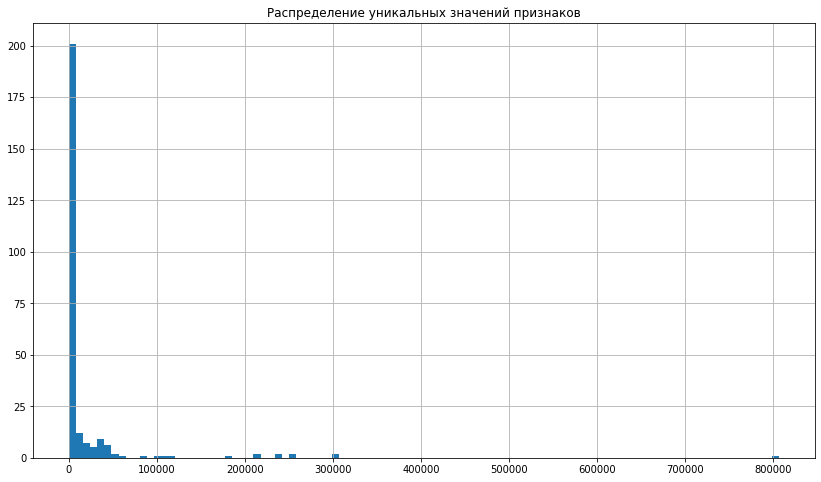

In [16]:
X_nunique = train_df.apply(lambda x: x.nunique(dropna=False))

plt.title("Распределение уникальных значений признаков");
X_nunique.hist(bins=100, figsize=(14, 8));

In [17]:
# всего призков (удалим из них buy_time, id, target, vas_id)
all_ = set(X_nunique.index.tolist()[4:])

#Константные признаки (принимают только одно значение - их можно удалить)
const = set(X_nunique[X_nunique == 1].index.tolist())

# Числовые признаки
numeric = (train_df.fillna(0).astype(int).sum() - train_df.fillna(0).sum()).abs()
numeric = set(numeric[numeric > 0].index.tolist())
other = all_ - (numeric | const)

# Бинарные признаки
binary = set(train_df.loc[:, other].columns[(
        (train_df.loc[:, other].max() == 1) &
        (train_df.loc[:, other].min() == 0) &
        (train_df.loc[:, other].isnull().sum() == 0))])

# Категориальные признаки
categorical = set(X_nunique.loc[other][X_nunique.loc[other] <= 30].index.tolist())
numeric_extra = categorical

other = other - categorical
numeric = numeric | other

print('Всего признаков (из них было удалено 4):', train_df.shape[1] - 4)
print('Константные признаки:', len(const))
print('Бинарные признаки:', len(binary))
print('Категориальные:', len(categorical))
print('Вещественные признаки:', len(numeric))
train_df.shape, test_df.shape

Всего признаков (из них было удалено 4): 253
Константные признаки: 5
Бинарные признаки: 0
Категориальные: 1
Вещественные признаки: 247


((831627, 257), (71227, 256))

In [18]:
const = list(const)
train_df = train_df.loc[:, ~train_df.columns.isin(const)]
test_df = test_df.loc[:, ~test_df.columns.isin(const)]
train_df.shape, test_df.shape

((831627, 252), (71227, 251))

In [19]:
def non_informan(train_df):
  num_rows = len(train_df.index)
  low_information_cols = [] #

  for col in train_df.columns:
      cnts = train_df[col].value_counts(dropna=False)
      top_pct = (cnts/num_rows).iloc[0]
      
      if top_pct > 0.90:
          low_information_cols.append(col)
  if 'target' in low_information_cols:
    low_information_cols.remove('target')
  return low_information_cols

train_df_new = train_df.loc[:, ~train_df.columns.isin(non_informan(train_df))]
test_df_new = test_df.loc[:, ~test_df.columns.isin(non_informan(train_df))]
train_df_new.shape, test_df_new.shape

((831627, 138), (71227, 137))

## Стандартизация признаков

In [20]:
train_df_new_features = train_df_new.drop(['id', 'vas_id', 'buy_time', 'target'], axis=1)
train_df_new_id = train_df_new[['id', 'vas_id', 'buy_time', 'target']]
train_df_new_id

,id,vas_id,buy_time,target
0,2,2.0,1545598800,0.0
12,49,1.0,1537131600,0.0
15,64,5.0,1546203600,0.0
17,70,1.0,1536526800,0.0
18,104,1.0,1533502800,0.0
...,...,...,...,...
831648,4362634,1.0,1546203600,0.0
831649,4362640,2.0,1546203600,0.0
831650,4362647,6.0,1546203600,0.0
831651,4362684,5.0,1545598800,0.0


In [21]:
sdfs= StandardScaler()
scale = sdfs.fit_transform(train_df_new_features)
train_df_new_scaler = pd.DataFrame(scale, columns=train_df_new_features.columns, index=train_df_new_features.index)
train_df_new_scaler.head()

,0,1,2,3,4,5,6,7,9,13,...,241,242,243,244,245,246,247,248,250,252
0,-0.257880,0.429413,-0.289977,0.528949,-0.297075,0.441803,-0.049114,-0.157697,-0.135433,-0.432455,...,0.028253,-0.12109,0.746440,0.699972,-0.023101,-0.126031,0.300595,0.061902,-0.088828,-0.094013
12,0.068805,0.140606,0.032164,0.051346,0.017251,0.010430,-0.049114,-0.143788,-0.135433,0.209059,...,-0.266556,-0.12109,-0.299659,-0.272270,-0.025292,-0.114089,-0.197069,0.031766,0.122006,0.252989
15,0.167287,0.358942,0.129275,0.237113,0.112007,0.178215,-0.049114,0.438572,-0.135433,0.621494,...,0.670515,-0.12109,-0.217962,-0.262575,-0.027482,-0.133993,-0.072056,1.066433,-0.088828,-0.094013
17,-0.154401,-0.458542,-0.187937,-0.514399,-0.197511,-0.500554,-0.049114,-0.157697,-0.135433,-0.175940,...,-0.266556,-0.12109,-0.299659,-0.272270,-0.027482,-0.133993,-0.236882,-0.123936,-0.088828,-0.094013
18,-0.115966,0.179993,-0.117219,0.117452,-0.128508,0.070137,0.088009,0.287552,-0.015208,-0.432455,...,-0.266556,-0.12109,-0.283702,-0.252419,-0.026387,-0.130012,-0.162033,-0.068687,-0.014016,0.252989


In [22]:
train_finish = train_df_new_id.join(train_df_new_scaler)
train_finish

,id,vas_id,buy_time,target,0,1,2,3,4,5,...,241,242,243,244,245,246,247,248,250,252
0,2,2.0,1545598800,0.0,-0.257880,0.429413,-0.289977,0.528949,-0.297075,0.441803,...,0.028253,-0.12109,0.746440,0.699972,-0.023101,-0.126031,0.300595,0.061902,-0.088828,-0.094013
12,49,1.0,1537131600,0.0,0.068805,0.140606,0.032164,0.051346,0.017251,0.010430,...,-0.266556,-0.12109,-0.299659,-0.272270,-0.025292,-0.114089,-0.197069,0.031766,0.122006,0.252989
15,64,5.0,1546203600,0.0,0.167287,0.358942,0.129275,0.237113,0.112007,0.178215,...,0.670515,-0.12109,-0.217962,-0.262575,-0.027482,-0.133993,-0.072056,1.066433,-0.088828,-0.094013
17,70,1.0,1536526800,0.0,-0.154401,-0.458542,-0.187937,-0.514399,-0.197511,-0.500554,...,-0.266556,-0.12109,-0.299659,-0.272270,-0.027482,-0.133993,-0.236882,-0.123936,-0.088828,-0.094013
18,104,1.0,1533502800,0.0,-0.115966,0.179993,-0.117219,0.117452,-0.128508,0.070137,...,-0.266556,-0.12109,-0.283702,-0.252419,-0.026387,-0.130012,-0.162033,-0.068687,-0.014016,0.252989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
831648,4362634,1.0,1546203600,0.0,-0.257880,-0.720311,-0.289977,-0.747568,-0.297075,-0.711154,...,-0.266556,-0.12109,-0.299659,-0.272270,-0.027482,-0.133993,-0.236882,-0.123936,-0.088828,-0.094013
831649,4362640,2.0,1546203600,0.0,-0.249900,-0.137577,-0.275658,-0.199980,-0.283103,-0.216570,...,-0.266556,-0.12109,-0.298701,-0.270885,-0.027482,-0.133993,-0.236882,-0.123936,-0.088828,0.252989
831650,4362647,6.0,1546203600,0.0,-0.249900,-0.137577,-0.275658,-0.199980,-0.283103,-0.216570,...,-0.266556,-0.12109,-0.298701,-0.270885,-0.027482,-0.133993,-0.236882,-0.123936,-0.088828,0.252989
831651,4362684,5.0,1545598800,0.0,-0.094014,0.072264,-0.097792,0.016865,-0.109552,-0.020714,...,1.778679,-0.12109,-0.104353,-0.002664,-0.025292,-0.133993,2.172610,-0.098823,-0.088828,-0.094013


In [23]:
test_df_new_features = test_df_new.drop(['id', 'vas_id', 'buy_time'], axis=1)
test_df_new_id = test_df_new[['id', 'vas_id', 'buy_time']]
test_df_new_id

,id,vas_id,buy_time
1,64,4.0,1548018000
3,274,4.0,1548018000
6,604,6.0,1547413200
7,691,2.0,1546808400
8,776,2.0,1547413200
...,...,...,...
71226,4362676,2.0,1548018000
71227,4362677,2.0,1547413200
71228,4362697,5.0,1546808400
71229,4362712,5.0,1547413200


In [24]:
sdfs= StandardScaler()
scale = sdfs.fit_transform(test_df_new_features)
test_df_new_scaler = pd.DataFrame(scale, columns=test_df_new_features.columns, index=test_df_new_features.index)
test_df_new_scaler.head()

,0,1,2,3,4,5,6,7,9,13,...,241,242,243,244,245,246,247,248,250,252
1,0.853037,0.782154,1.015603,0.687594,0.966595,0.594086,-0.169312,-0.329108,-0.237032,1.222363,...,-0.124624,-0.103826,0.922069,-0.287053,-0.029697,-0.137100,-0.119847,-0.145696,-0.070477,-0.516591
3,0.853037,0.782154,1.015603,0.687594,0.966595,0.594086,-0.169312,-0.329108,-0.237032,1.222363,...,-0.124624,-0.103826,0.922069,-0.287053,-0.029697,-0.137100,-0.119847,-0.145696,-0.070477,-0.516591
6,-0.417959,-0.856719,-0.464975,-0.863827,-0.459104,-0.805451,-0.169312,-0.329108,-0.237032,-0.317955,...,-0.271420,-0.103826,-0.318973,-0.287053,-0.032096,-0.137100,-0.224166,-0.117267,-0.070477,1.932832
7,-0.480609,-0.360198,-0.523714,-0.432791,-0.515666,-0.416613,-0.169312,-0.329108,-0.237032,-0.393880,...,-0.273714,-0.103826,-0.322561,-0.287053,-0.032896,-0.137100,-0.236769,-0.150434,-0.070477,-0.516591
8,0.122305,0.645180,0.087642,0.493253,0.073029,0.418771,-0.169312,-0.329108,-0.237032,-0.393880,...,0.178145,0.736667,-0.267251,-0.239044,0.009493,1.902425,-0.200362,-0.145696,-0.070477,-0.516591


In [25]:
test_finish = test_df_new_id.join(test_df_new_scaler)
test_finish

,id,vas_id,buy_time,0,1,2,3,4,5,6,...,241,242,243,244,245,246,247,248,250,252
1,64,4.0,1548018000,0.853037,0.782154,1.015603,0.687594,0.966595,0.594086,-0.169312,...,-0.124624,-0.103826,0.922069,-0.287053,-0.029697,-0.137100,-0.119847,-0.145696,-0.070477,-0.516591
3,274,4.0,1548018000,0.853037,0.782154,1.015603,0.687594,0.966595,0.594086,-0.169312,...,-0.124624,-0.103826,0.922069,-0.287053,-0.029697,-0.137100,-0.119847,-0.145696,-0.070477,-0.516591
6,604,6.0,1547413200,-0.417959,-0.856719,-0.464975,-0.863827,-0.459104,-0.805451,-0.169312,...,-0.271420,-0.103826,-0.318973,-0.287053,-0.032096,-0.137100,-0.224166,-0.117267,-0.070477,1.932832
7,691,2.0,1546808400,-0.480609,-0.360198,-0.523714,-0.432791,-0.515666,-0.416613,-0.169312,...,-0.273714,-0.103826,-0.322561,-0.287053,-0.032896,-0.137100,-0.236769,-0.150434,-0.070477,-0.516591
8,776,2.0,1547413200,0.122305,0.645180,0.087642,0.493253,0.073029,0.418771,-0.169312,...,0.178145,0.736667,-0.267251,-0.239044,0.009493,1.902425,-0.200362,-0.145696,-0.070477,-0.516591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71226,4362676,2.0,1548018000,-0.480609,0.561079,-0.523714,0.385405,-0.515666,0.321481,-0.169312,...,0.334117,-0.097311,-0.319870,-0.286211,-0.021699,-0.122445,-0.135950,-0.145696,-0.070477,1.932832
71227,4362677,2.0,1547413200,0.137954,-0.166352,0.123970,-0.143158,0.108011,-0.155336,-0.169312,...,-0.273714,-0.103826,-0.322561,-0.287053,-0.032896,-0.137100,-0.236769,-0.150434,-0.070477,-0.516591
71228,4362697,5.0,1546808400,-0.263560,-0.082945,-0.299260,-0.191601,-0.299532,-0.199036,-0.169312,...,-0.273714,-0.103826,-0.295653,-0.284526,-0.032896,-0.132215,-0.189860,-0.150434,-0.070477,-0.516591
71229,4362712,5.0,1547413200,0.137954,-0.166352,0.123970,-0.143158,0.108011,-0.155336,-0.169312,...,-0.273714,-0.103826,-0.322561,-0.287053,-0.032896,-0.137100,-0.236769,-0.150434,-0.070477,-0.516591


In [26]:
train_finish['buy_time'] = pd.to_datetime(train_finish['buy_time'], unit='s')
test_finish['buy_time'] = pd.to_datetime(test_finish['buy_time'], unit='s')
test_finish.sample()

,id,vas_id,buy_time,0,1,2,3,4,5,6,...,241,242,243,244,245,246,247,248,250,252
43600,2630165,6.0,2019-01-13 21:00:00,-0.480609,-0.626671,-0.523714,-0.666918,-0.515666,-0.627819,-0.169312,...,0.5222,-0.103826,-0.109392,-0.284526,-0.023298,-0.134658,1.452639,-0.036718,-0.070477,-0.516591


In [27]:
train_finish['month'] = pd.DatetimeIndex(train_finish['buy_time']).month
test_finish['month'] = pd.DatetimeIndex(test_finish['buy_time']).month

train_finish['day'] = pd.DatetimeIndex(train_finish['buy_time']).day
test_finish['day'] = pd.DatetimeIndex(test_finish['buy_time']).day

## Проверка целевой переменной

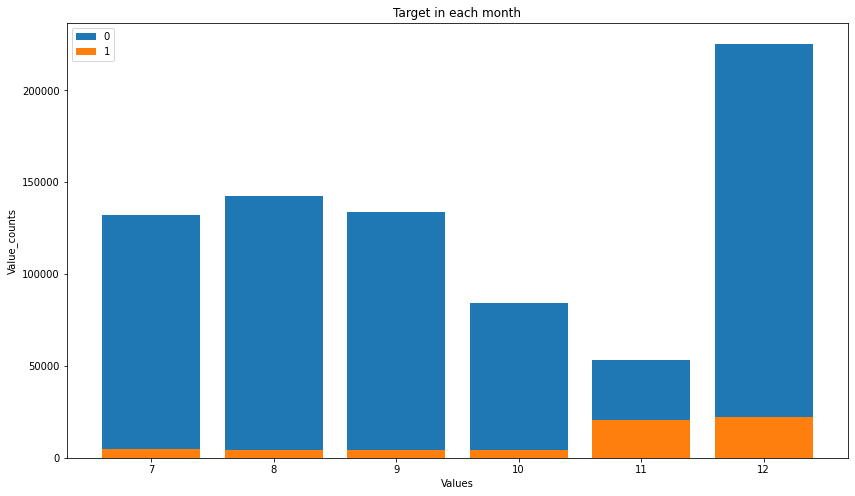

In [28]:
plt.figure(figsize=(14, 8))

months_1 = train_finish.loc[train_finish.target==1].month.value_counts().sort_values()
months_0 = train_finish.loc[train_finish.target==0].month.value_counts().sort_values()

plt.bar(months_0.index, months_0.values, label='0')
plt.bar(months_1.index, months_1.values, label='1')

plt.title('Target in each month')
plt.xlabel('Values')
plt.ylabel('Value_counts')
plt.legend()
plt.show()

In [29]:
for month in train_finish.month.unique():
  print(f'For month # {month}')
  print(train_finish.loc[train_finish.month==month].target.value_counts(normalize=True))

For month # 12
0.0    0.910323
1.0    0.089677
Name: target, dtype: float64
For month # 9
0.0    0.969002
1.0    0.030998
Name: target, dtype: float64
For month # 8
0.0    0.971947
1.0    0.028053
Name: target, dtype: float64
For month # 7
0.0    0.965905
1.0    0.034095
Name: target, dtype: float64
For month # 10
0.0    0.95005
1.0    0.04995
Name: target, dtype: float64
For month # 11
0.0    0.721374
1.0    0.278626
Name: target, dtype: float64


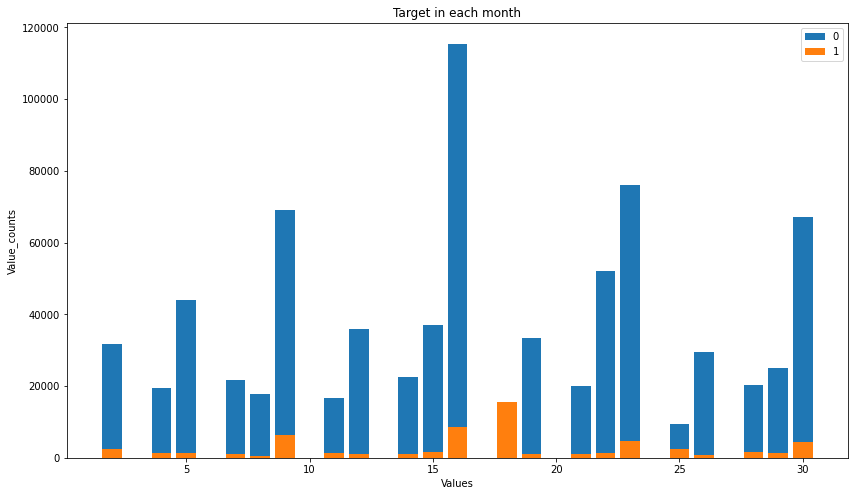

In [30]:
plt.figure(figsize=(14, 8))

days_1 = train_finish.loc[train_finish.target==1].day.value_counts().sort_values()
days_0 = train_finish.loc[train_finish.target==0].day.value_counts().sort_values()

plt.bar(days_0.index, days_0.values, label='0', )
plt.bar(days_1.index, days_1.values, label='1')

plt.title('Target in each month')
plt.xlabel('Values')
plt.ylabel('Value_counts')
plt.legend()
plt.show()

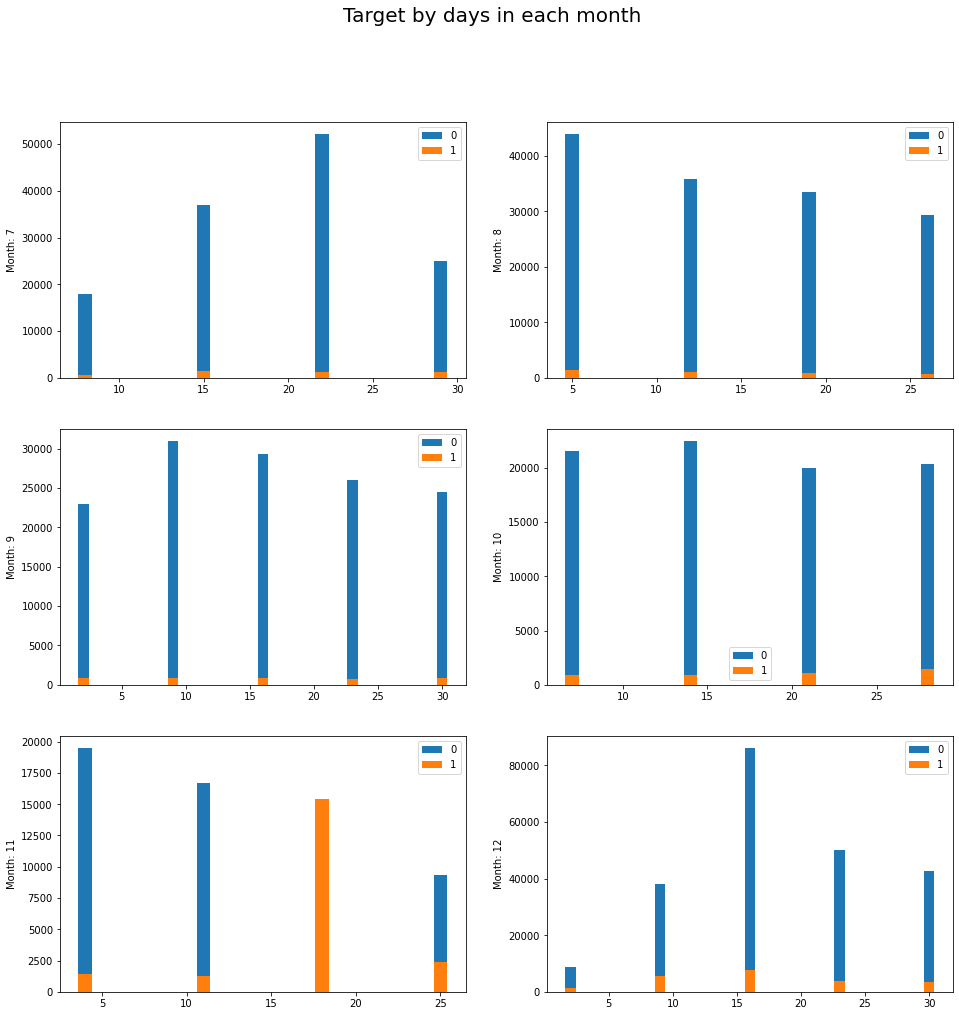

In [31]:
months = np.sort(train_finish.month.unique())
fig=plt.figure(figsize=(16, 16))

plt.suptitle("Target by days in each month", size=20)
i=0
for month_ in months:
    
    days_1 = train_finish.loc[(train_finish.target==1) & (train_finish.month==month_)].day.value_counts().sort_values()
    days_0 = train_finish.loc[(train_finish.target==0) & ((train_finish.month==month_))].day.value_counts().sort_values()
    
    ax=plt.subplot(321+i)
    ax = plt.bar(days_0.index, days_0.values, label='0', )
    ax = plt.bar(days_1.index, days_1.values, label='1')

    ax = plt.ylabel(f'Month: {month_}')
    ax = plt.legend()
    i+=1  

## Балансировка целевой переменной

In [32]:
def balance_df_by_target(df, target_name):
    
    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)
            
    return df.sample(frac=1) 

In [33]:
disbalance = train_finish.target.value_counts()[0] / train_finish.target.value_counts()[1]
disbalance

12.817615392283919

In [34]:
train_finish['target'].value_counts()

0.0    771441
1.0     60186
Name: target, dtype: int64

In [35]:
train_finish = balance_df_by_target(train_finish, 'target')
    
train_finish['target'].value_counts()

0.0    771441
1.0    722232
Name: target, dtype: int64

In [36]:
train_finish

,id,vas_id,buy_time,target,0,1,2,3,4,5,...,243,244,245,246,247,248,250,252,month,day
1329517,1115330,6.0,2018-10-14 21:00:00,1.0,-0.257880,-0.793448,-0.289977,-0.822277,-0.297075,-0.778631,...,-0.299659,-0.272270,-0.027482,-0.133993,-0.236882,-0.123936,-0.088828,-0.094013,10,14
602133,3129443,1.0,2018-12-23 21:00:00,0.0,-0.253877,-0.104058,-0.223748,-0.065318,-0.232453,-0.094942,...,-0.155732,-0.246879,0.105036,-0.133993,-0.204235,-0.093800,-0.088828,0.252989,12,23
1101752,359144,4.0,2018-11-25 21:00:00,1.0,-0.257880,-0.390583,-0.289977,-0.451924,-0.297075,-0.444127,...,-0.153818,-0.063141,-0.005578,0.164565,0.315724,-0.103846,-0.088828,-0.094013,11,25
1052506,1303039,6.0,2018-12-09 21:00:00,1.0,0.207684,1.289698,0.169111,1.100229,0.150876,0.957786,...,0.360296,0.682429,-0.027482,-0.133993,-0.187514,-0.123936,-0.088828,-0.094013,12,9
1199894,2671366,2.0,2018-11-18 21:00:00,1.0,-0.216515,-0.190675,-0.249187,-0.268149,-0.257274,-0.278140,...,-0.299659,-0.272270,-0.027482,-0.133993,-0.236882,-0.123936,-0.088828,-0.094013,11,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016517,266367,6.0,2018-12-23 21:00:00,1.0,0.103786,-0.516185,0.066658,-0.567389,0.061583,-0.541665,...,-0.299659,-0.272270,-0.027482,-0.133993,-0.224142,-0.123936,-0.088828,-0.094013,12,23
587853,3052861,2.0,2018-11-18 21:00:00,0.0,-0.249900,-0.377083,-0.194645,-0.379754,-0.204056,-0.378942,...,-0.275086,-0.269500,-0.027482,-0.133993,-0.108684,-0.103846,-0.088828,-0.094013,11,18
579878,3010998,1.0,2018-08-12 21:00:00,0.0,0.177438,-0.251462,0.139286,-0.271745,0.121774,-0.281388,...,-0.295510,-0.267191,-0.027482,-0.133993,-0.210605,-0.088778,-0.041220,-0.094013,8,12
195257,1002889,2.0,2018-12-16 21:00:00,0.0,-0.250764,-0.754425,-0.282959,-0.786403,-0.290228,-0.746230,...,-0.299659,-0.272270,-0.027482,-0.133993,-0.236882,-0.123936,-0.088828,-0.094013,12,16


## Разделение данных на train и test и обучени моделей

In [37]:
train_finish_data = train_finish.drop(['target','buy_time'], axis=1)
test_finish_data = test_finish.drop('buy_time', axis=1)
train_finish_target = train_finish['target']

In [38]:
train_finish_data.head()

,id,vas_id,0,1,2,3,4,5,6,7,...,243,244,245,246,247,248,250,252,month,day
1329517,1115330,6.0,-0.257880,-0.793448,-0.289977,-0.822277,-0.297075,-0.778631,-0.049114,-0.157697,...,-0.299659,-0.272270,-0.027482,-0.133993,-0.236882,-0.123936,-0.088828,-0.094013,10,14
602133,3129443,1.0,-0.253877,-0.104058,-0.223748,-0.065318,-0.232453,-0.094942,-0.049114,-0.157697,...,-0.155732,-0.246879,0.105036,-0.133993,-0.204235,-0.093800,-0.088828,0.252989,12,23
1101752,359144,4.0,-0.257880,-0.390583,-0.289977,-0.451924,-0.297075,-0.444127,-0.049114,-0.157697,...,-0.153818,-0.063141,-0.005578,0.164565,0.315724,-0.103846,-0.088828,-0.094013,11,25
1052506,1303039,6.0,0.207684,1.289698,0.169111,1.100229,0.150876,0.957786,-0.049114,-0.157697,...,0.360296,0.682429,-0.027482,-0.133993,-0.187514,-0.123936,-0.088828,-0.094013,12,9
1199894,2671366,2.0,-0.216515,-0.190675,-0.249187,-0.268149,-0.257274,-0.278140,-0.049114,-0.157697,...,-0.299659,-0.272270,-0.027482,-0.133993,-0.236882,-0.123936,-0.088828,-0.094013,11,18


In [39]:
train_finish_target.head()

1329517    1.0
602133     0.0
1101752    1.0
1052506    1.0
1199894    1.0
Name: target, dtype: float32

In [40]:
X_train, X_test, y_train, y_test = train_test_split(train_finish_data, train_finish_target, test_size=0.33, random_state=42)

In [41]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1000760, 138), (1000760,), (492913, 138), (492913,))

In [42]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

def evaluate_preds(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

In [60]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=4)
cv_score = cross_val_score(
    rf,
    X_train,
    y_train,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
)
cv_score
# rf.fit(X_train, y_train)

# y_train_pred = rf.predict(X_train)
# y_test_pred = rf.predict(X_test)


# get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

array([0.74115086, 0.74306662, 0.74158122, 0.7427757 , 0.74422364])

In [61]:
catb = CatBoostClassifier(silent=True,learning_rate=0.01, max_depth=4,iterations=50, random_state=21)

cv_score = cross_val_score(
    catb,
    X_train,
    y_train,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
)
cv_score
# catb.fit(X_train, y_train)

# y_train_pred = catb.predict(X_train)
# y_test_pred = catb.predict(X_test)

# get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

array([0.87815264, 0.87823924, 0.87755741, 0.87779069, 0.87830867])

In [62]:
model_lgbm = LGBMClassifier(random_state=21, n_estimators=100)
cv_score = cross_val_score(
    model_lgbm,
    X_train,
    y_train,
    scoring='f1',
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=21)
)
cv_score
# model_lgbm.fit(X_train, y_train)

# y_train_pred = model_lgbm.predict(X_train)
# y_test_pred = model_lgbm.predict(X_test)


# get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

array([0.88689903, 0.88704687, 0.88681679, 0.88615292, 0.88711264])

##Финальная модель

In [43]:
model_final = LGBMClassifier(random_state=21, n_estimators=100)
model_final.fit(train_finish_data, train_finish_target)

test_pred = model_final.predict(test_finish_data)

pickle.dump(
    model_final, open("model.pkl", "wb")
)

In [44]:
test_pred

array([1., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [45]:
test_pred_finish = test_finish[['id', 'vas_id', 'buy_time']]
test_pred_finish['target'] = test_pred
test_pred_finish.to_csv('test_pred.csv', index=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
